# Prediction using Unsupervised ML
In this Notebook we are going to use Unsupervised ML Algorithm KMeans Clustering to form divide similar objects into groups called clusters.
### Task II by Krishna Bisen

In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
file_loc = 'C:/Users/Prometheus/Untitled Folder/datasets/Iris.csv'
iris = pd.read_csv(file_loc)
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


We are gonna drop Species for now and use it later to check how our model worked.

In [3]:
species = iris['Species']
df = iris.drop(columns=['Id', 'Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
x = df.values

We are now going to measure the quality of clustering with different number of clusters using Inertia. For each value of k:
We create a KMeans instance called model with k clusters.
Fit the model to the Iris data.
Append the value of the inertia_ attribute of model to the list inertias.

In [8]:
inertias = []
for k in range(1,8):
#   Create KMeans Instance for k clusters: model
    model = KMeans(n_clusters=k)
#    Fit model to Data
    model = model.fit(x)
#   Append the inertia to the list of Inertias
    inertias.append(model.inertia_)

Plot the Inertia to determine the best value of cluster, Lower is better.

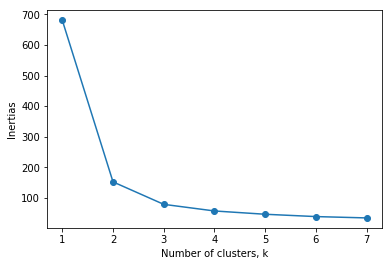

In [9]:
plt.plot(range(1,8), inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertias')
plt.show()

We can see from the graph above that 3 would be a good number of cluster for the model.

Now let us do the KMeans with 3 clusters.

In [11]:
model = KMeans(n_clusters=3)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Derive the Cluster Labels

In [12]:
labels = model.predict(x)

Make a DataFrame to check how many time each spiecies coincides with each cluster label.

In [13]:
cv = pd.DataFrame({'Labels':labels, 'Species':species})

ct = pd.crosstab(cv.Labels, cv.Species)

ct

Species,Iris-setosa,Iris-versicolor,Iris-virginica
Labels,,,
0,50,0,0
1,0,48,14
2,0,2,36


Our cluster 1 perfectly represents Iris-setosa, and there's a little error in Iris-vesicolor and Iris-virginica

In [14]:
setosa = ct[ct['Iris-setosa']==ct['Iris-setosa'].max()].index.values

versicolor = ct[ct['Iris-versicolor']==ct['Iris-versicolor'].max()].index.values

virginica = ct[ct['Iris-virginica']==ct['Iris-virginica'].max()].index.values

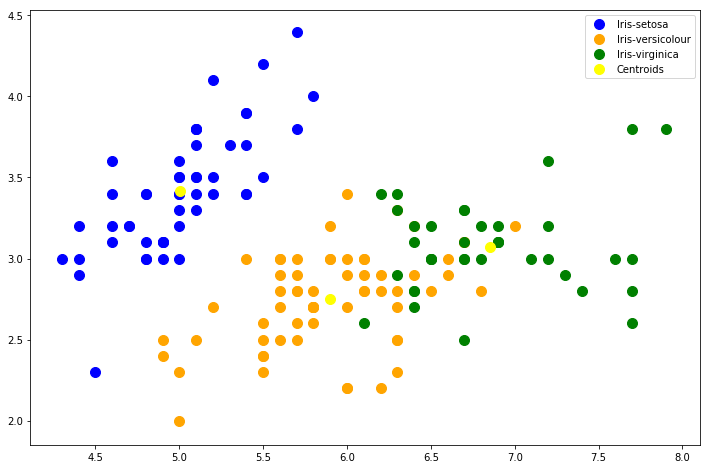

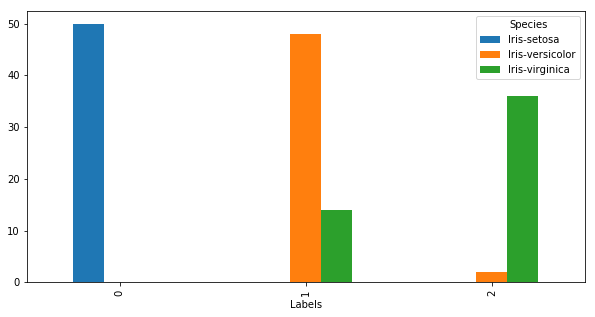

In [15]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(12,8))
plt.scatter(x[labels == setosa, 0], x[labels == setosa, 1], 
            s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[labels == versicolor, 0], x[labels == versicolor, 1], 
            s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[labels == virginica, 0], x[labels == virginica, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
ct.plot(kind = 'bar', figsize=(10,5))

The Scatter plot above represents the cluster formed by our model, while the bar plot represents how our formed cluster are similar to the classes that were provided to us in dataset.

## Thank you